In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pwd

'C:\\Users\\balajigm\\balaji_notebook'

In [4]:
#load datasets

athletes = pd.read_csv('C:\\Users\\balajigm\\balaji_notebook\\athlete_events.csv')
regions = pd.read_csv('C:\\Users\\balajigm\\balaji_notebook\\noc_regions.csv')

In [5]:
athletes.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [6]:
regions.head(3)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN


In [7]:
# merging two tables
athlete_df = athletes.merge(regions, how = 'left', on = 'NOC')
athlete_df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [8]:
#columns name consistent
athlete_df.rename(columns={'region':'Regions','notes':'Notes'},inplace=True)
athlete_df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Regions,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [9]:
athlete_df.shape

(271116, 17)

In [10]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       271116 non-null  int64  
 1   Name     271116 non-null  object 
 2   Sex      271116 non-null  object 
 3   Age      261642 non-null  float64
 4   Height   210945 non-null  float64
 5   Weight   208241 non-null  float64
 6   Team     271116 non-null  object 
 7   NOC      271116 non-null  object 
 8   Games    271116 non-null  object 
 9   Year     271116 non-null  int64  
 10  Season   271116 non-null  object 
 11  City     271116 non-null  object 
 12  Sport    271116 non-null  object 
 13  Event    271116 non-null  object 
 14  Medal    39783 non-null   object 
 15  Regions  270746 non-null  object 
 16  Notes    5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [11]:
athlete_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [20]:
nan_values = athlete_df.isna().any()
nan_values

ID         False
Name       False
Sex        False
Age         True
Height      True
Weight      True
Team       False
NOC        False
Games      False
Year       False
Season     False
City       False
Sport      False
Event      False
Medal       True
Regions     True
Notes       True
dtype: bool

In [27]:
# to find out how many null values in each columns
athlete_df.isnull().sum()

ID              0
Name            0
Sex             0
Age          9474
Height      60171
Weight      62875
Team            0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal      231333
Regions       370
Notes      266077
dtype: int64

In [31]:
athlete_df[athlete_df['Team'] == 'India'].head(3)

# 0r we can write as athlete_df.query('Team == "India"').head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Regions,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [35]:
# ill use query method here to filter team which is japan
athlete_df.query('Team == "Japan"').head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Regions,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN


In [38]:
top_10_countries = athlete_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

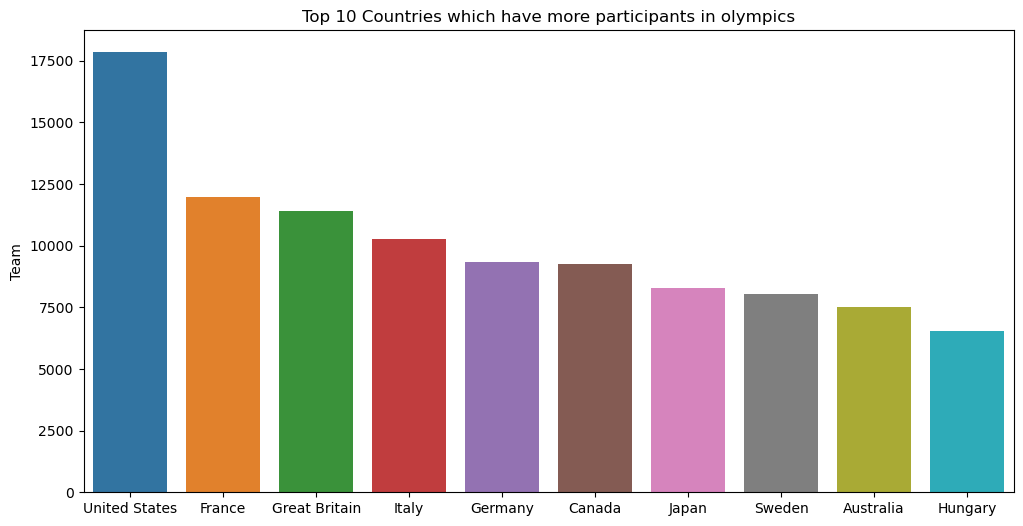

In [51]:
# plotting graph for top 10 countries

plt.figure(figsize=(12,6))
plt.title('Top 10 Countries which have more participants in olympics')
sns.barplot(x=top_10_countries.index, y=top_10_countries);
# OR
#import plotly.express as px
#fig = px.bar(x=top_10_countries.index, y=top_10_countries.values)
#fig.show()

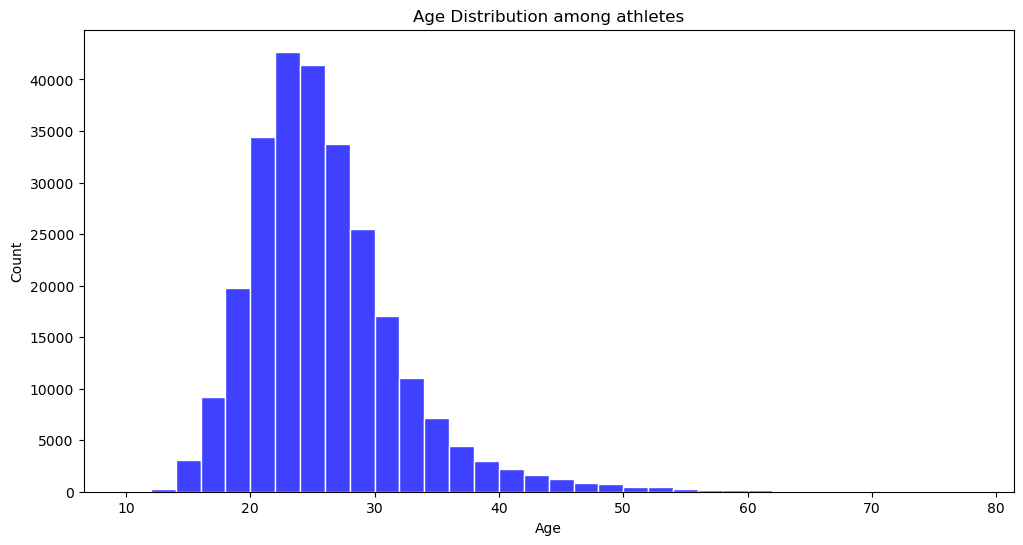

In [57]:
# Age distribution

plt.figure(figsize=(12,6))
plt.title("Age Distribution among athletes")
plt.xlabel='Age'
plt.ylabel='Number of participants'
sns.histplot(athlete_df.Age, bins = np.arange(10,80,2), color = 'Blue', edgecolor = 'white')
plt.show()

In [60]:
winter_olympics = athlete_df[athlete_df['Season'] == 'Winter']['Sport'].unique()
winter_olympics

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [62]:
# another format
summer_olympics = athlete_df[athlete_df.Season == 'Summer'].Sport.unique()
summer_olympics

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [71]:
gender_counts = athlete_df['Sex'].value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

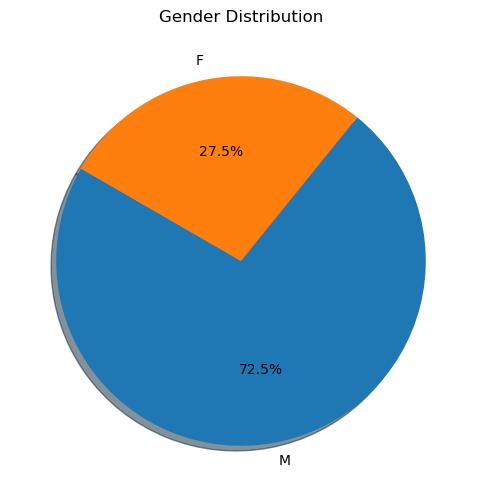

In [74]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', shadow = True, startangle=150)
plt.show()

In [75]:
athlete_df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Regions,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [76]:
athlete_df['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [88]:
female_counts = athlete_df[(athlete_df['Sex'] == 'F') & (athlete_df['Season'] == 'Summer')][['Sex','Year']]
female_counts = female_counts.groupby('Year').count().reset_index()
female_counts.tail(5)

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


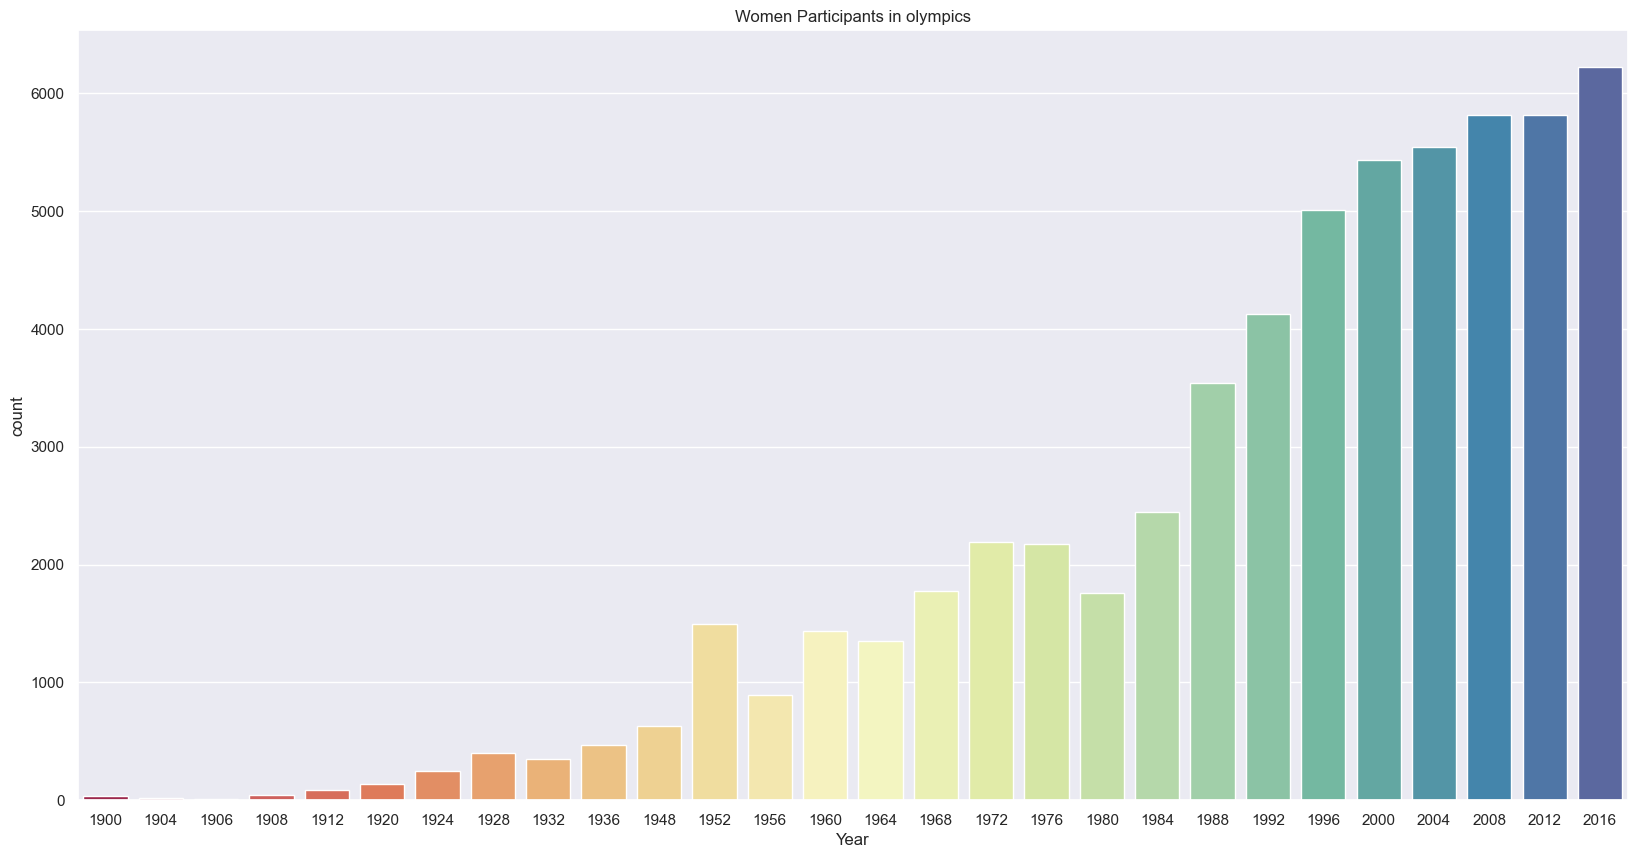

In [93]:
womenOlympics = athlete_df[(athlete_df['Sex'] == 'F') & (athlete_df['Season'] == 'Summer')]
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
plt.title('Women Participants in olympics')
sns.countplot(x='Year',data=womenOlympics,palette='Spectral')
plt.show()

In [95]:
goldMedals = athlete_df[athlete_df['Medal'] == 'Gold']
goldMedals.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Regions,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [100]:
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

In [111]:
goldMedals['ID'][goldMedals.Age > 60]

# goldMedals['ID'][goldMedals['Age'] > 60].count()

104003     52626
105199     53238
190952     95906
226374    113773
233390    117046
261102    130662
Name: ID, dtype: int64

In [121]:
sport_gold = goldMedals['Sport'][goldMedals.Age > 60]
sport_gold

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

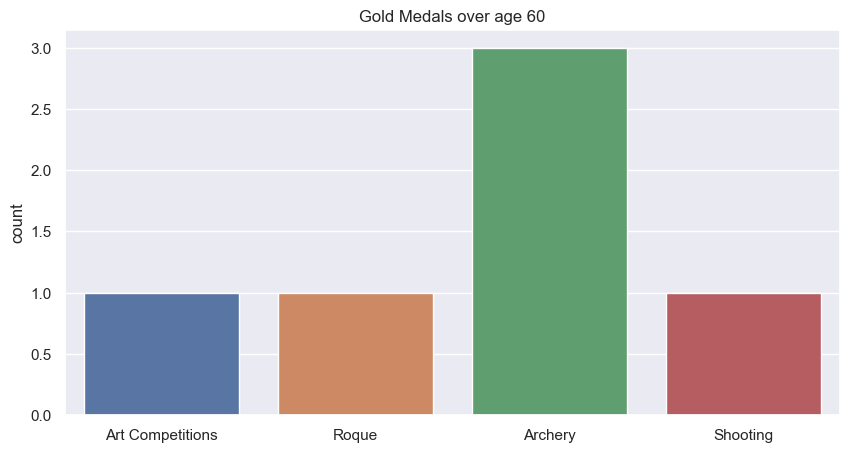

In [120]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(x=sport_gold.values, data = sport_gold)
plt.title('Gold Medals over age 60')
plt.show()

In [123]:
goldMedals.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Regions,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN


In [135]:
goldMedals['Regions'].value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Text(0.5, 1.0, 'Top 6 countries with more gold medals')

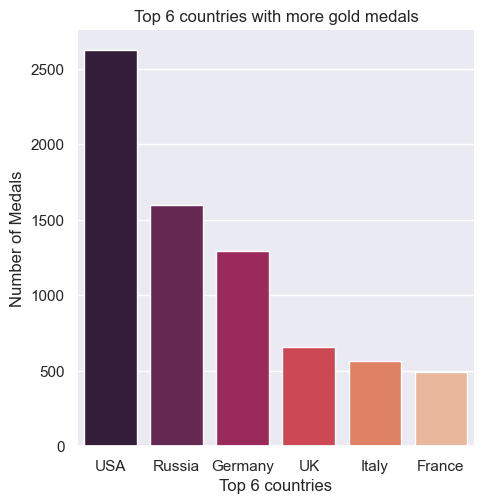

In [138]:
total_goldmedals = goldMedals['Regions'].value_counts().reset_index(name='Medal').head(6)
p = sns.catplot(x='index', y='Medal', data = total_goldmedals, kind = 'bar',palette = 'rocket' )
p.despine(left=True)
p.set_xlabels('Top 6 countries')
p.set_ylabels('Number of Medals')
plt.title('Top 6 countries with more gold medals')

In [140]:
max_year = athlete_df['Year'].max()
max_year

2016

In [143]:
team_names = athlete_df[(athlete_df['Year'] == max_year) & (athlete_df['Medal'] == 'Gold')]['Team']
team_names.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

<AxesSubplot:xlabel='Team'>

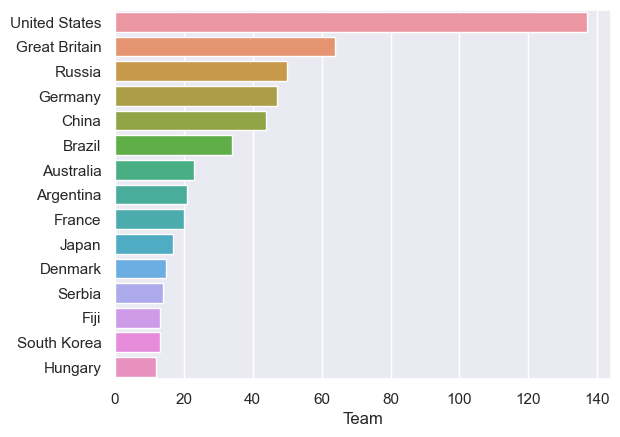

In [152]:
sns.barplot(x=team_names.value_counts().head(15),y=team_names.value_counts().head(15).index)

